## Section1: Importing Libraries

In [218]:
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import scipy.stats as stats

#plotting library
import matplotlib.pyplot as plt # plotting
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
# the plot will automatically display below the cell where the plot is created, without needing to explicitly call plt show %matplotlib inline 


#ML  Libraries
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score,KFold
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score, classification_report
from math import sqrt
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.tree import plot_tree

#Ml Models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

## Section 2: Loading Data set

In [39]:
#importing the dataset
vgsales_data= pd.read_csv(r"C:\prajwal\OneDrive\Desktop\UEL\Dissertation\Dataset\vgsales.csv")

# Section 3: Data Preprocessing

In [42]:
#to check number of rows and columns
Shape = vgsales_data.shape
print("Shape of the DataFrame:", Shape)

Shape of the DataFrame: (16598, 11)


In [44]:
print("\n Dataset Info:")
vgsales_data.info()


 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [46]:
print("\n Dataset Info:")
vgsales_data.head()


 Dataset Info:


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [48]:
vgsales_data

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [50]:
# Analyze data types
types = vgsales_data.dtypes
print("\nData types:\n", types)


Data types:
 Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object


## Descriptive Statistics

In [53]:
print("\nDescriptive Statistics for numerical features:")
vgsales_data.describe()



Descriptive Statistics for numerical features:


,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [55]:
vgsales_data.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

## Checking Null Values

In [58]:
# vgsales_data['Year']=vgsales_data['Year'].astype("Int64")
# vgsales_data.dtypes

In [60]:
#checking null values
print("\nMissing Values:")
vgsales_data.isnull().sum()


Missing Values:


Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [62]:
print("\nPercentage of missing values:\n", (vgsales_data.isnull().sum() / len(vgsales_data)) * 100)


Percentage of missing values:
 Rank            0.000000
Name            0.000000
Platform        0.000000
Year            1.632727
Genre           0.000000
Publisher       0.349440
NA_Sales        0.000000
EU_Sales        0.000000
JP_Sales        0.000000
Other_Sales     0.000000
Global_Sales    0.000000
dtype: float64


## Duplicate check

In [65]:
#duplicate check
print("\n Dupicate count:")
len(vgsales_data)-len(vgsales_data.drop_duplicates())


 Dupicate count:


0

##  Category and numeric columns

In [68]:
cat, num = [],[]
for columns in vgsales_data.columns:
    if vgsales_data[columns].dtype=='object':
        cat.append(columns)
    else:
        num.append(columns)
print('Category:',cat)
print('Numeric:',num)

Category: ['Name', 'Platform', 'Genre', 'Publisher']
Numeric: ['Rank', 'Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']


# Section 4: Exploratory Data Analysis(EDA)

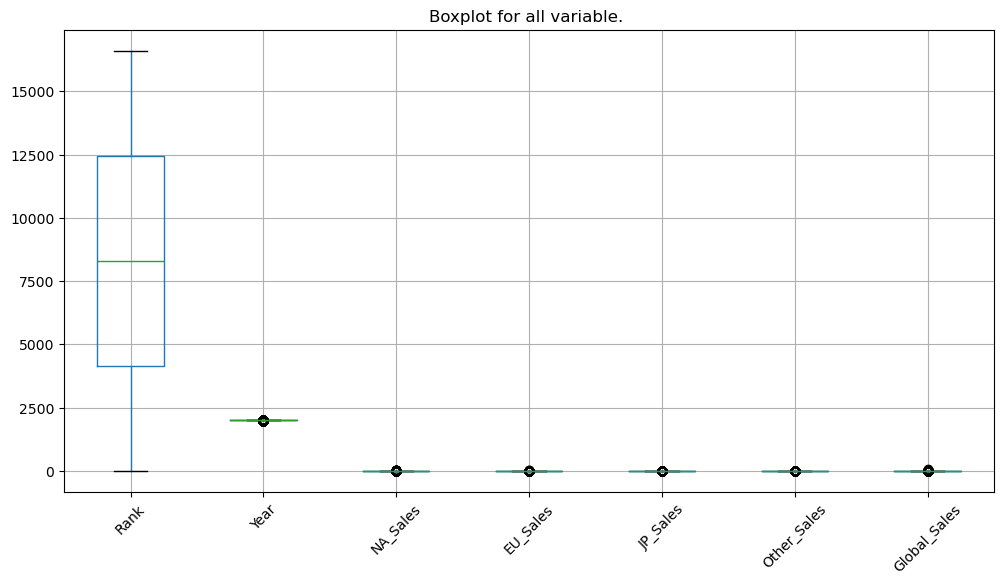

In [71]:
#boxplot for all numerical variable in single figure
plt.figure(figsize=(12, 6))
vgsales_data.boxplot()
plt.title(f"Boxplot for all variable. ")
plt.xticks(rotation=45)  # Rotate x labels for better visibility
plt.show()

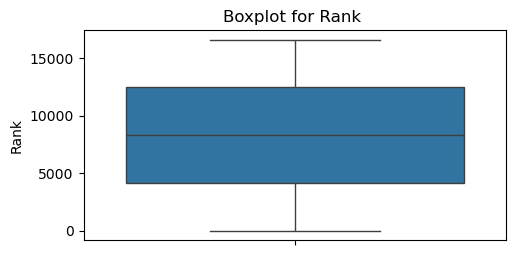

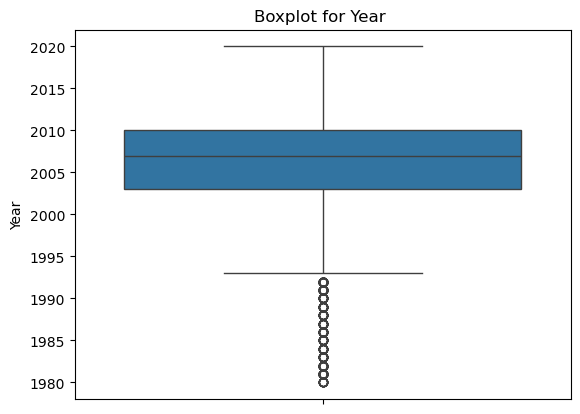

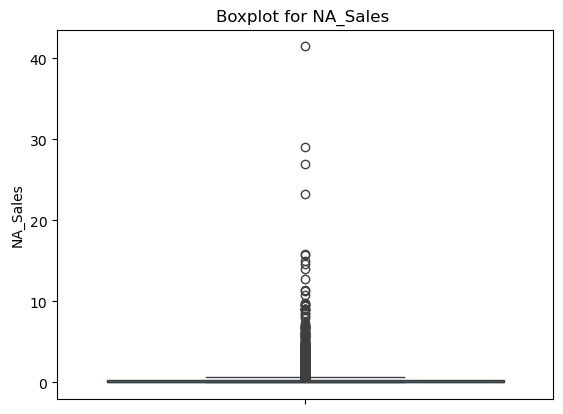

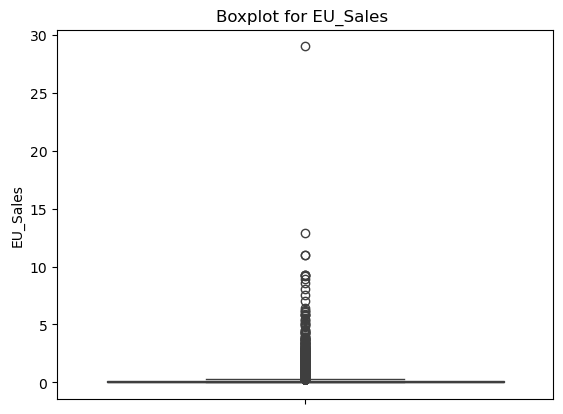

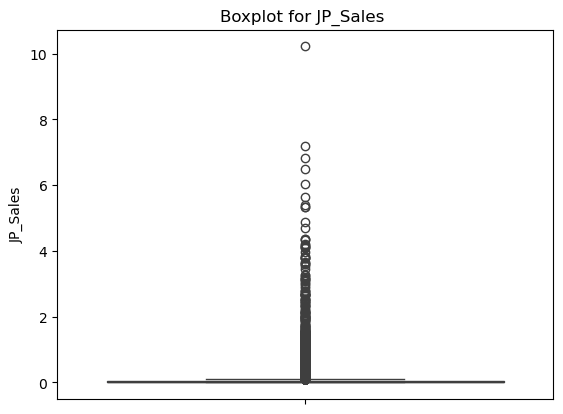

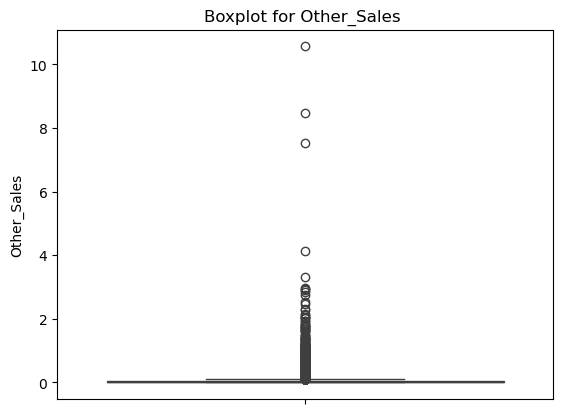

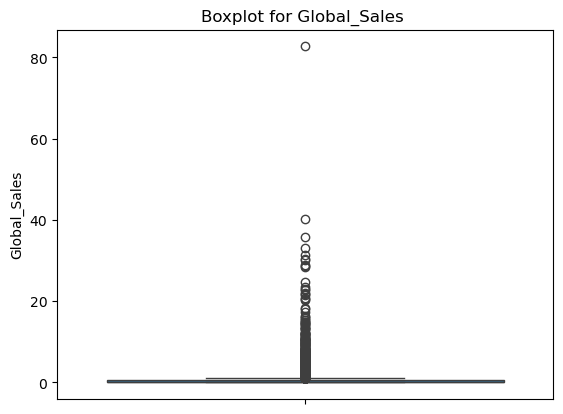

In [72]:
#Boxplot for individual variable
# Set the figure size
plt.figure(figsize=(12, 6))
plt.subplot(2,2,1)

list= ["Rank","Year","NA_Sales","EU_Sales","JP_Sales","Other_Sales","Global_Sales"]
for items in list:
    sns.boxplot(vgsales_data[items])
    plt.title(f"Boxplot for {items} ")
    plt.xticks(rotation=45)  # Rotate x labels for better visibility
    plt.show()

In [75]:
# Define Q1, Q3, and IQR
print("\nIQR Method")
for item in num:
    Q1 = vgsales_data[item].quantile(0.25)
    Q3 = vgsales_data[item].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define outlier bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count outliers
    outliers = vgsales_data[(vgsales_data[item] < lower_bound) | (vgsales_data[item] > upper_bound)]
    num_outliers = outliers.shape[0]
    
    print(f"\t Number of outliers for  {item}: {num_outliers}")


IQR Method
	 Number of outliers for  Rank: 0
	 Number of outliers for  Year: 305
	 Number of outliers for  NA_Sales: 1681
	 Number of outliers for  EU_Sales: 2081
	 Number of outliers for  JP_Sales: 2425
	 Number of outliers for  Other_Sales: 1665
	 Number of outliers for  Global_Sales: 1893


In [77]:
# # Boxplot for Global_Sales
# plt.figure(figsize=(6, 6))
# sns.boxplot(vgsales_data["Global_Sales"])
# plt.title("Boxplot for Global Sales")
# plt.show()


In [79]:
#Setting limit for outlier

def outlier_detection(data):
    outlier_list = []
    threshold = 4
    mean_avg = np.mean(data)
    stddeviation = np.std(data)
    for variable in data:
        z_score = (variable - mean_avg)/stddeviation
        if np.abs(z_score) > threshold:
            outlier_list.append(variable)
    return outlier_list

In [81]:
print("\nZ-Score Method")
for variables in num:
    outliers = outlier_detection(vgsales_data[variables])
    if len(outliers) > 0:
        print(f"\tNumber of outliers for {variables} --> {len(outliers)}")


Z-Score Method
	Number of outliers for Year --> 108
	Number of outliers for NA_Sales --> 109
	Number of outliers for EU_Sales --> 128
	Number of outliers for JP_Sales --> 154
	Number of outliers for Other_Sales --> 108
	Number of outliers for Global_Sales --> 119


## Charts

## Global sales over year

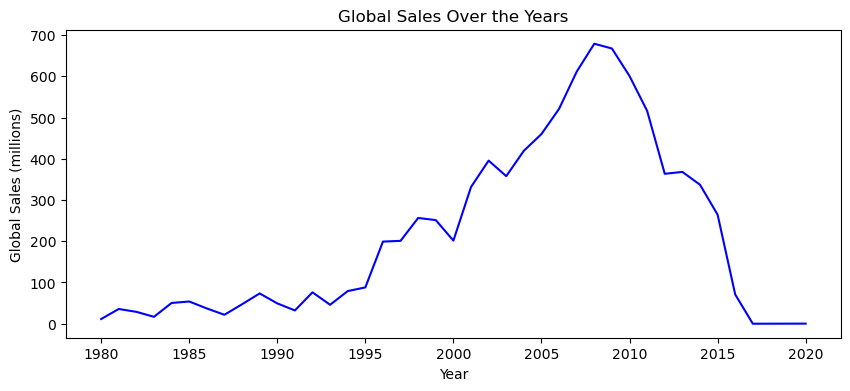

In [85]:
vgsales_data.groupby('Year')['Global_Sales'].sum().plot(kind='line', figsize=(10,4), color='blue')

# Adding titles and labels
plt.title("Global Sales Over the Years")
plt.xlabel("Year")
plt.ylabel("Global Sales (millions)")

# Display the plot
plt.show()


Frequency table for Platform:
Platform
DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: count, dtype: int64


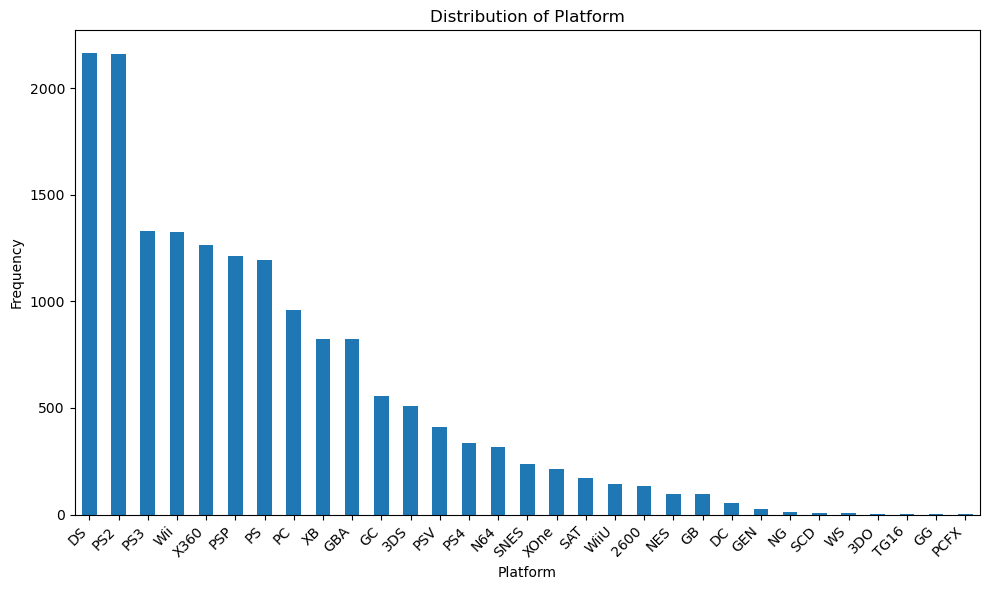


Frequency table for Genre:
Genre
Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: count, dtype: int64


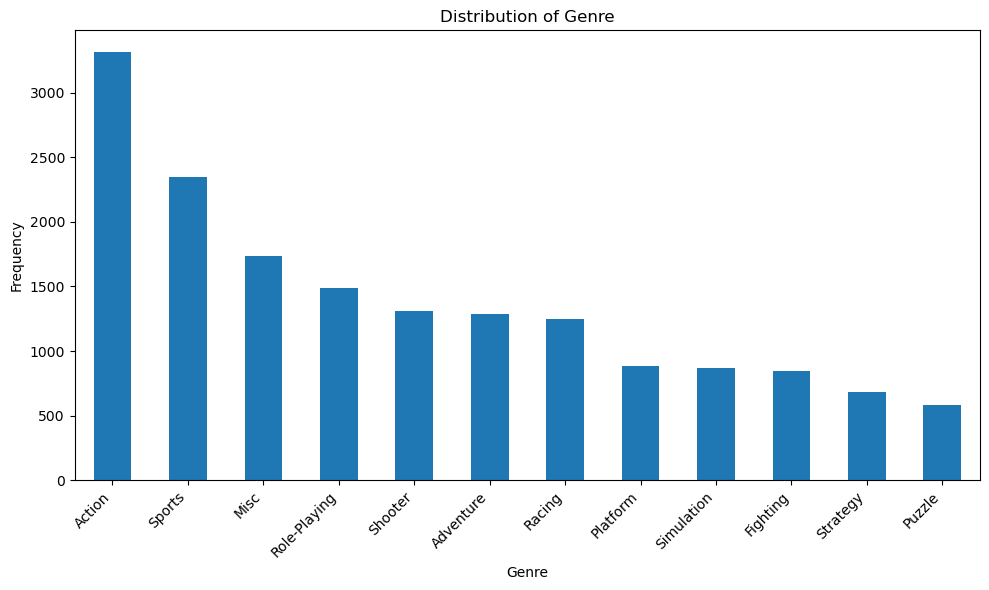


Frequency table for Publisher:
Publisher
Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
                                ... 
Warp                               1
New                                1
Elite                              1
Evolution Games                    1
UIG Entertainment                  1
Name: count, Length: 578, dtype: int64


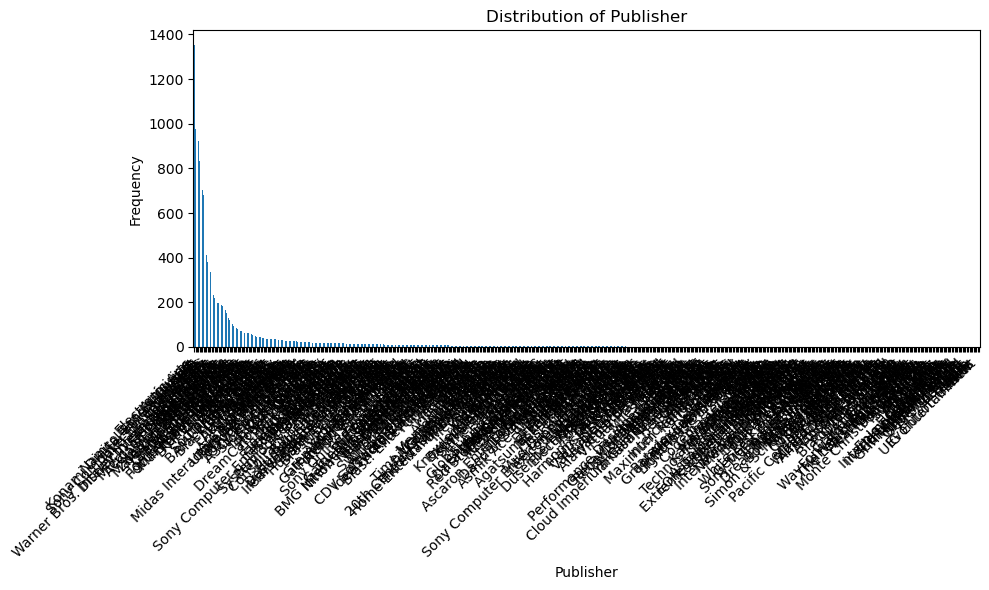

In [87]:
# Explore categorical features
categorical_cols = ['Platform', 'Genre', 'Publisher']
for col in categorical_cols:
    print(f"\nFrequency table for {col}:\n{vgsales_data[col].value_counts()}")
    plt.figure(figsize=(10, 6))
    vgsales_data[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

## Checking Best selling games

In [89]:
# Top 10 best-selling games globally
print("\nTop 10 Best-Selling Games:")
print(vgsales_data[['Name', 'Global_Sales']].sort_values(by='Global_Sales', ascending=False).head(10))


Top 10 Best-Selling Games:
                        Name  Global_Sales
0                 Wii Sports         82.74
1          Super Mario Bros.         40.24
2             Mario Kart Wii         35.82
3          Wii Sports Resort         33.00
4   Pokemon Red/Pokemon Blue         31.37
5                     Tetris         30.26
6      New Super Mario Bros.         30.01
7                   Wii Play         29.02
8  New Super Mario Bros. Wii         28.62
9                  Duck Hunt         28.31


## Most common Genres

C:\Users\prajj\AppData\Local\Temp\ipykernel_31668\1912799834.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=vgsales_data['Genre'], order=vgsales_data['Genre'].value_counts().index, palette='viridis')


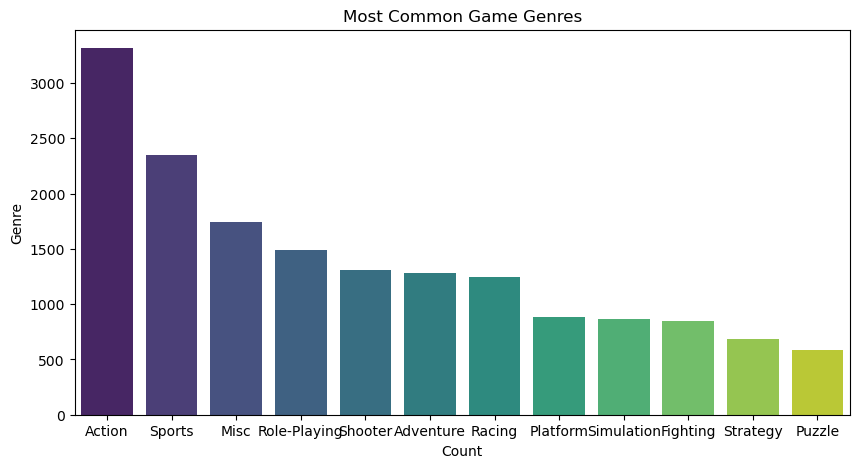

In [91]:
vgsales_data['Genre'].value_counts()

# Most common genres showing by barchart
plt.figure(figsize=(10,5))
sns.countplot(x=vgsales_data['Genre'], order=vgsales_data['Genre'].value_counts().index, palette='viridis')
plt.title("Most Common Game Genres")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()


genre_counts = vgsales_data['Genre'].value_counts()



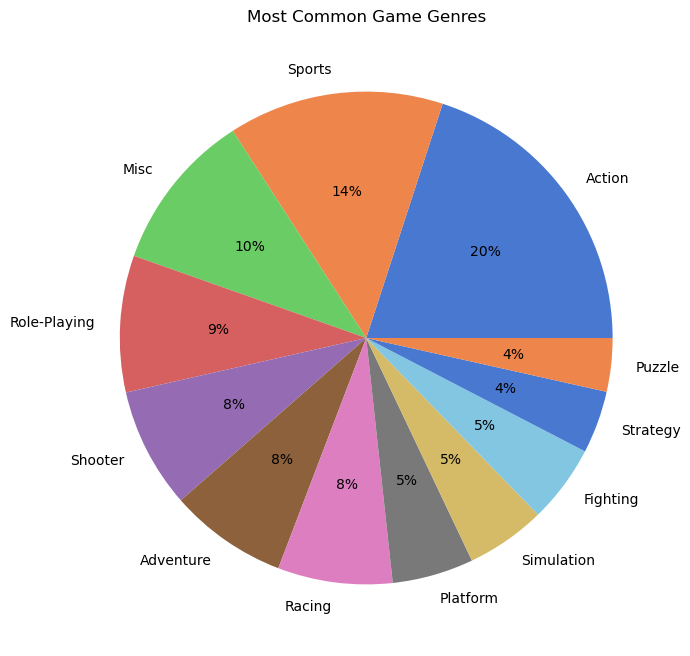

In [95]:
# Plotting the pie chart
plt.figure(figsize=(8,8))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.f%%', colors=sns.color_palette('muted', len(genre_counts)))
plt.title("Most Common Game Genres")
plt.ylabel('')  # Hide the y-axis label for a cleaner pie chart

# Display the plot
plt.show()

##  Common platforms

In [98]:
vgsales_data['Platform'].value_counts()


Platform
DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: count, dtype: int64

C:\Users\prajj\AppData\Local\Temp\ipykernel_31668\680850077.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=vgsales_data['Platform'], order=vgsales_data['Platform'].value_counts().index[:], palette='coolwarm')


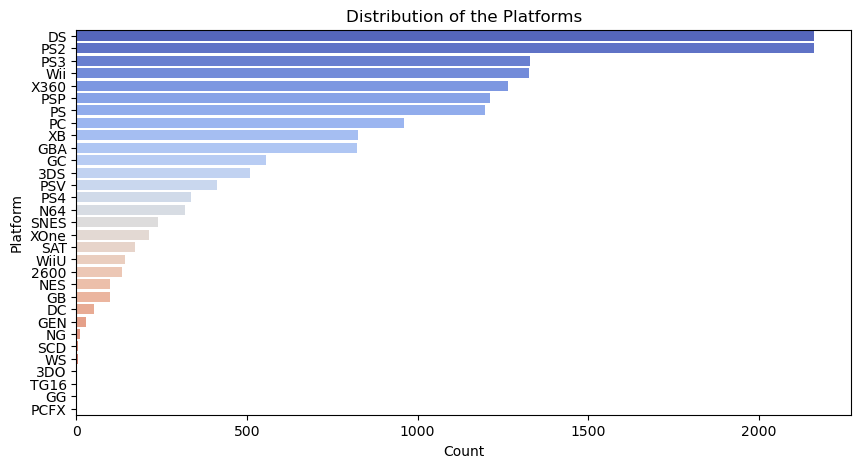

In [100]:
# Most common platforms
plt.figure(figsize=(10,5))
sns.countplot(y=vgsales_data['Platform'], order=vgsales_data['Platform'].value_counts().index[:], palette='coolwarm')
plt.title("Distribution of the Platforms")
plt.xlabel("Count")
plt.ylabel("Platform")
plt.show()

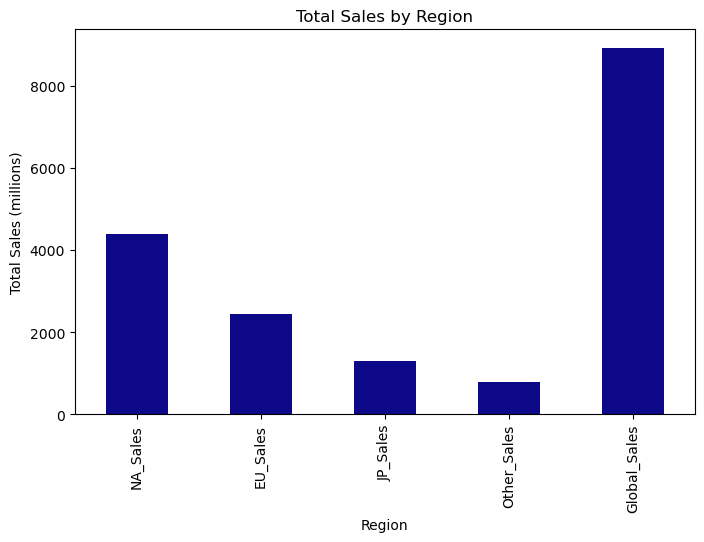

In [101]:
# Sales distribution by region
sales_cols = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
vgsales_data[sales_cols].sum().plot(kind='bar', figsize=(8,5), colormap='plasma')
plt.title("Total Sales by Region")
plt.xlabel("Region")
plt.ylabel("Total Sales (millions)")
plt.show()

# # Group the data by Genre and sum the sales for each region
# sales_by_genre = vgsales_data.groupby('Genre')[sales_cols].sum()

# # Plotting the sales distribution by genre and region (stacked bar chart)
# ax = sales_by_genre.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='plasma')

# # Adding titles and labels
# plt.title("Sales Distribution by Region and Genre")
# plt.xlabel("Genre")
# plt.ylabel("Total Sales (millions)")

# # Display the plot
# plt.show()

C:\Users\prajj\AppData\Local\Temp\ipykernel_31668\3834861074.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Genre", y="Global_Sales", data=vgsales_data, capsize=0.1, palette="husl")


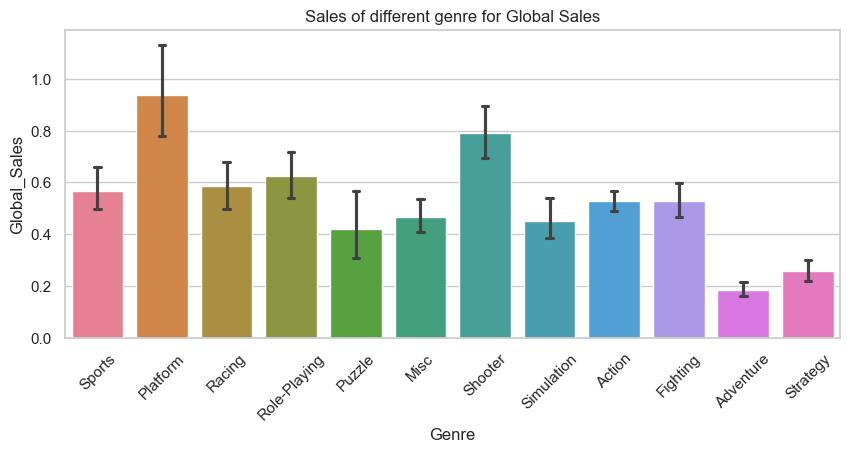

In [104]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 4))
ax = sns.barplot(x="Genre", y="Global_Sales", data=vgsales_data, capsize=0.1, palette="husl")
# Add labels and title
plt.xlabel("Genre")
plt.ylabel("Global_Sales")
plt.title(f"Sales of different genre for Global Sales")
    
# Show the plot
plt.xticks(rotation=45)  # Rotate x labels if needed
plt.show()

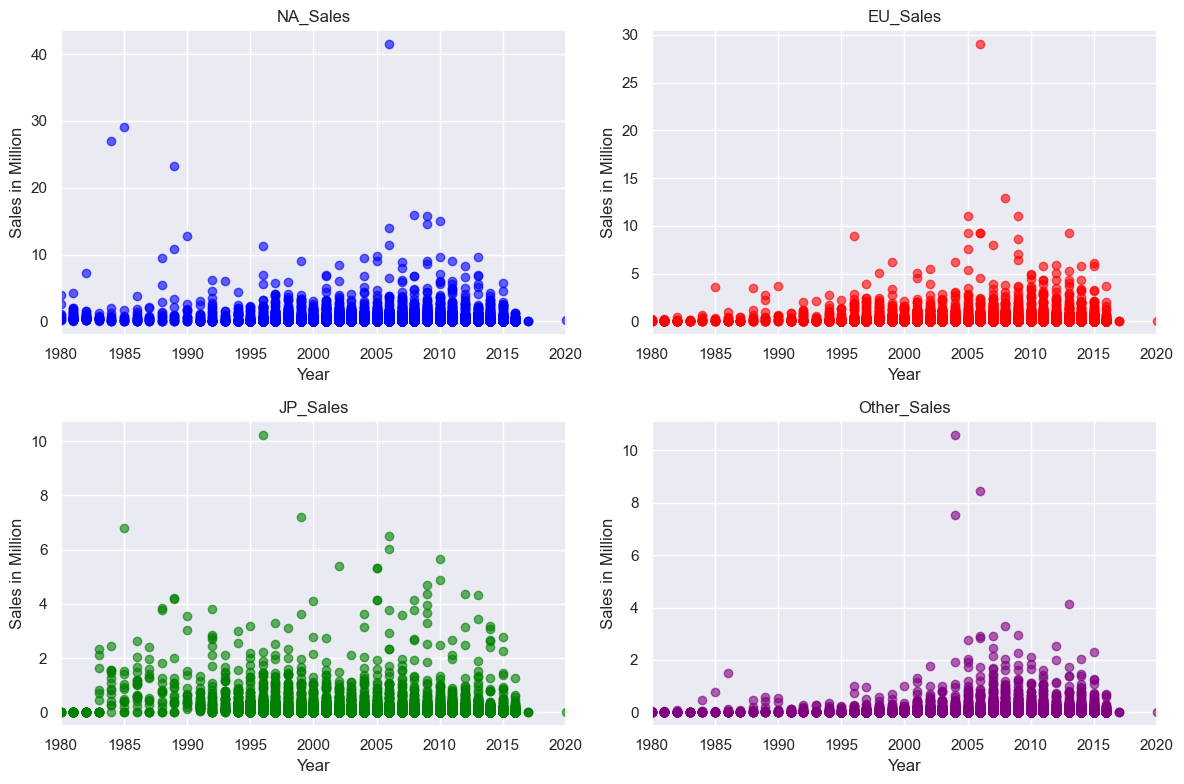

In [105]:
#The scatter plots for columns that contains outliers are shown below

# Set plot style
sns.set(style="darkgrid")

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # 2 rows, 2 columns
axes = axes.flatten()

# Lists of regions and corresponding colors
regions = ["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]
colors = ["blue", "red", "green", "purple"]

# Iterate through each region and plot
for i, (region, color) in enumerate(zip(regions, colors)):
    ax = axes[i]
    ax.scatter(vgsales_data['Year'], vgsales_data[region], alpha=0.6, color=color)
    ax.set_title(region)
    ax.set_xlabel("Year")
    ax.set_ylabel("Sales in Million")
    ax.set_xlim(vgsales_data['Year'].min(), vgsales_data['Year'].max())

# Adjust layout to prevent overlap
plt.tight_layout()

# Show plot
plt.show()

# Section 5:

## Correlation between variables / bivariate analysis

                  Rank      Year  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
Rank          1.000000  0.178814 -0.401362 -0.379123 -0.267785    -0.332986   
Year          0.178814  1.000000 -0.091402  0.006014 -0.169316     0.041058   
NA_Sales     -0.401362 -0.091402  1.000000  0.767727  0.449787     0.634737   
EU_Sales     -0.379123  0.006014  0.767727  1.000000  0.435584     0.726385   
JP_Sales     -0.267785 -0.169316  0.449787  0.435584  1.000000     0.290186   
Other_Sales  -0.332986  0.041058  0.634737  0.726385  0.290186     1.000000   
Global_Sales -0.427407 -0.074735  0.941047  0.902836  0.611816     0.748331   

              Global_Sales  
Rank             -0.427407  
Year             -0.074735  
NA_Sales          0.941047  
EU_Sales          0.902836  
JP_Sales          0.611816  
Other_Sales       0.748331  
Global_Sales      1.000000  


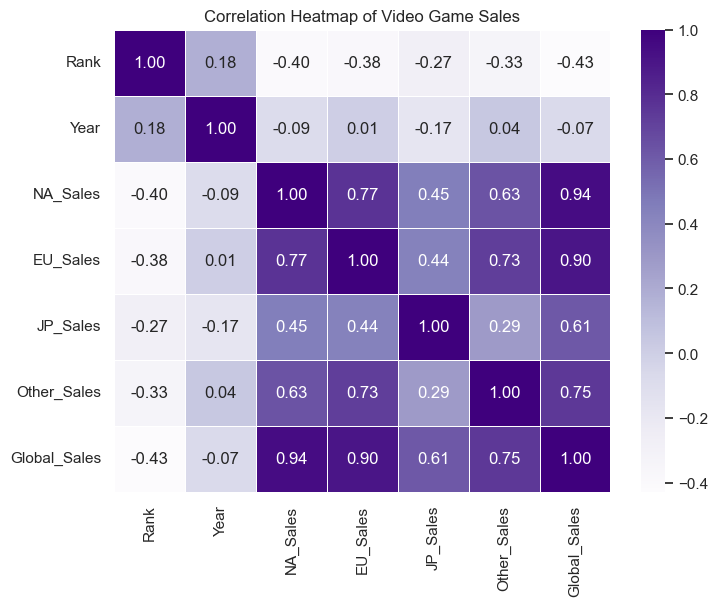

In [109]:
# Selected only numeric columns
numeric_data = vgsales_data.select_dtypes(include=[np.number])
corr_matrix = numeric_data.corr()
print(corr_matrix)

# Set plot style
sns.set(style="white")

# Create heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="Purples", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Video Game Sales")
plt.show()

In [110]:
# Finding strong correlations
strong_corr = {}  # Dictionary to store strong correlations
seen_pairs = set()  # Set to keep track of already seen pairs

for feature in corr_matrix.columns:
    for key in corr_matrix.index:
        value = corr_matrix.loc[feature, key]
        if (value > 0.80 or value < -0.97) and (feature != key):  
            # Sort the pair to avoid considering reversed pairs as different
            pair = tuple(sorted([feature, key]))  # Sort to get a consistent order
            if pair not in seen_pairs:
                seen_pairs.add(pair)  # Add the pair to the set
                strong_corr[pair] = value  # Store the pair in the dictionary
                print(f"{pair[0]} -- {pair[1]}: {value:.2f}")

# Print final strong correlations dictionary
print("\nStrong Correlation Pairs:", strong_corr)

Global_Sales -- NA_Sales: 0.94
EU_Sales -- Global_Sales: 0.90

Strong Correlation Pairs: {('Global_Sales', 'NA_Sales'): 0.9410473571255572, ('EU_Sales', 'Global_Sales'): 0.9028358134817438}


## Applying Chi-square testing on category variable

In [115]:
# Function to apply Chi-Square test on two categorical columns
def chi_square_test(df, col1, col2):
    contingency_table = pd.crosstab(df[col1], df[col2])  # Create contingency table
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)  # Chi-Square test
    print(f"Chi-Square Test between {col1} and {col2}:")
    print(f"Chi2 Statistic: {chi2:.4f}, p-value: {p:.4f}, Degrees of Freedom: {dof}")
    if p < 0.05:
        print(f"Result: {col1} and {col2} are dependent (reject H0)\n")
    else:
        print(f"Result: {col1} and {col2} are independent (fail to reject H0)\n")

# Apply the test on different pairs
chi_square_test(vgsales_data, 'Genre', 'Platform')
chi_square_test(vgsales_data, 'Genre', 'Publisher')
chi_square_test(vgsales_data, 'Platform', 'Publisher')
chi_square_test(vgsales_data, 'Platform', 'Global_Sales')

Chi-Square Test between Genre and Platform:
Chi2 Statistic: 5909.9787, p-value: 0.0000, Degrees of Freedom: 330
Result: Genre and Platform are dependent (reject H0)

Chi-Square Test between Genre and Publisher:
Chi2 Statistic: 25587.3481, p-value: 0.0000, Degrees of Freedom: 6347
Result: Genre and Publisher are dependent (reject H0)

Chi-Square Test between Platform and Publisher:
Chi2 Statistic: 73562.0808, p-value: 0.0000, Degrees of Freedom: 17310
Result: Platform and Publisher are dependent (reject H0)

Chi-Square Test between Platform and Global_Sales:
Chi2 Statistic: 23116.1833, p-value: 0.0000, Degrees of Freedom: 18660
Result: Platform and Global_Sales are dependent (reject H0)



## Histogram Sales distribution by region

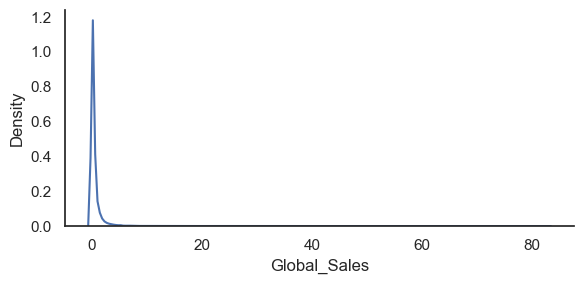

In [118]:
sns.displot(vgsales_data["Global_Sales"],kind="kde",height=3,aspect=2)

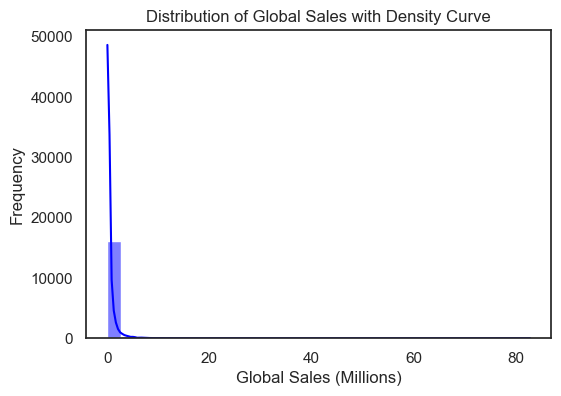

In [119]:
# Plot histogram with KDE (Kernel Density Estimate)
plt.figure(figsize=(6, 4))
sns.histplot(vgsales_data["Global_Sales"], kde=True, bins=30, color="blue")

# Labels and title
plt.xlabel("Global Sales (Millions)")
plt.ylabel("Frequency")
plt.title("Distribution of Global Sales with Density Curve")


# Show plot
plt.show()

## Checking Skewness

In [123]:
# Calculate skewness for numeric columns
skewness = numeric_data.skew()
print("\n Skewness Check:")
print("\t")
print(skewness)


 Skewness Check:
	
Rank             0.000066
Year            -1.002560
NA_Sales        18.799627
EU_Sales        18.875535
JP_Sales        11.206458
Other_Sales     24.233923
Global_Sales    17.400645
dtype: float64


# Section 6: Data Cleaning

## Removing Null Values

In [127]:
# #replacing year with a average value
# vgsales_data['Year']=vgsales_data['Year'].fillna(vgsales_data['Year'].mean())

In [129]:
# vgsales_data.loc[vgsales_data["Year"].isnull()==True]
vgsales_data=vgsales_data.dropna(subset=["Year"])
vgsales_data=vgsales_data.dropna(subset=["Publisher"])
vgsales_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  float64
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [131]:
print("\nMissing Values:")
print(vgsales_data.isnull().sum())
print("Total Rows after removing null values",vgsales_data.shape[0])


Missing Values:
Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64
Total Rows after removing null values 16291


## Handling Irrelevant Features

In [134]:
vgsales_data.drop("Name",axis=1,inplace=True)

In [136]:
vgsales_data.describe(include=object)


,Platform,Genre,Publisher
count,16291,16291,16291
unique,31,12,576
top,DS,Action,Electronic Arts
freq,2131,3251,1339


## Applying Log for normally distribution

In [139]:
vgsales_data['Log_Global_Sales'] = np.log1p(vgsales_data['Global_Sales'])

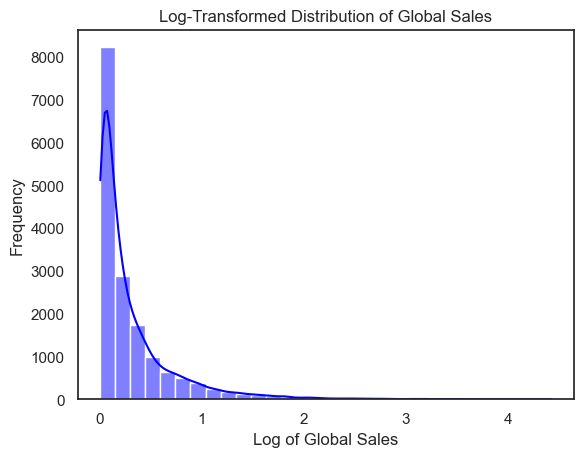

In [141]:
sns.histplot(x=np.log1p(vgsales_data["Global_Sales"]), kde=True, bins=30, color="blue")
plt.xlabel("Log of Global Sales")
plt.ylabel("Frequency")
plt.title("Log-Transformed Distribution of Global Sales")
plt.show()

In [143]:
# import statsmodels.api as sm
# sm.qqplot(vgsales_data["Global_Sales"], line='45')
# plt.title('Q-Q Plot of Dependent Variable')
# plt.show()

## Converting Categorical into integer values

In [146]:
categorical, numerical = [],[]
for columns in vgsales_data:
    if vgsales_data[columns].dtype=='object':
        categorical.append(columns)
    else:
        numerical.append(columns)
print('Category data:',categorical)
print('Numeric data:',numerical)

Category data: ['Platform', 'Genre', 'Publisher']
Numeric data: ['Rank', 'Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Log_Global_Sales']


In [148]:
#  Deleting irrelevant columns
# vgsales_data = vgsales_data.drop("Name", axis=1)
# vgsales_data = vgsales_data.drop("Publisher", axis=1)

In [150]:
vgsales_data['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [152]:
vgsales_data['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [154]:
# platform_int = pd.get_dummies(vgsales_data["Platform"],drop_first = True)
# platform_int=platform_int.astype(int)
# platform_int.head()

In [156]:
# genre_int = pd.get_dummies(vgsales_data["Genre"],drop_first = True)
# genre_int=genre_int.astype(int)
# genre_int.head()

In [158]:
# publisher_int = pd.get_dummies(vgsales_data["Publisher"],drop_first = True)
# publisher_int=publisher_int.astype(int)
# publisher_int.head()

In [160]:
# new_df = pd.concat([vgsales_data,platform_int,genre_int,publisher_int],axis=1)
# new_df = new_df.drop(["Platform","Genre","Publisher"],axis=1)
# new_df.head()

In [162]:
# one_hot_columns = ['Platform','Genre']
# def onehot_encode(data, columns):
#     for column in columns:
#         dummies=pd.get_dummies(data[column])
#         dummies=dummies.astype(int)
#         data = pd.concat([data,dummies],axis=1)
#         data.drop(column,axis=1, inplace= True)
#     return data
# data = onehot_encode(vgsales_data,one_hot_columns)
# data.head()

# Section 7: Feature Engineering:

## Label encoding

In [166]:
vgsales_data

,Rank,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Log_Global_Sales
0,1,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,4.427717
1,2,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,3.719409
2,3,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,3.606041
3,4,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,3.526361
4,5,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,3.477232
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01,0.009950
16594,16597,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01,0.009950
16595,16598,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01,0.009950
16596,16599,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01,0.009950


In [168]:
le_platform = LabelEncoder()
vgsales_data["Platform"] = le_platform.fit_transform(vgsales_data["Platform"].astype('str'))


In [170]:
le_genre = LabelEncoder()
vgsales_data["Genre"] = le_genre.fit_transform(vgsales_data["Genre"].astype('str'))

In [172]:
le_publisher = LabelEncoder()
vgsales_data["Publisher"] = le_publisher.fit_transform(vgsales_data["Publisher"].astype('str'))

In [174]:
# Print the mapping of category names to numbers
platform_mapping = dict(zip(le_platform.classes_, le_platform.transform(le_platform.classes_)))
genre_mapping = dict(zip(le_genre.classes_, le_genre.transform(le_genre.classes_)))

print("Platform Encoding Mapping:", platform_mapping)
print("Genre Encoding Mapping:", genre_mapping)



Platform Encoding Mapping: {'2600': 0, '3DO': 1, '3DS': 2, 'DC': 3, 'DS': 4, 'GB': 5, 'GBA': 6, 'GC': 7, 'GEN': 8, 'GG': 9, 'N64': 10, 'NES': 11, 'NG': 12, 'PC': 13, 'PCFX': 14, 'PS': 15, 'PS2': 16, 'PS3': 17, 'PS4': 18, 'PSP': 19, 'PSV': 20, 'SAT': 21, 'SCD': 22, 'SNES': 23, 'TG16': 24, 'WS': 25, 'Wii': 26, 'WiiU': 27, 'X360': 28, 'XB': 29, 'XOne': 30}
Genre Encoding Mapping: {'Action': 0, 'Adventure': 1, 'Fighting': 2, 'Misc': 3, 'Platform': 4, 'Puzzle': 5, 'Racing': 6, 'Role-Playing': 7, 'Shooter': 8, 'Simulation': 9, 'Sports': 10, 'Strategy': 11}


In [176]:
print("\nEncoded Data:")
vgsales_data.head()



Encoded Data:


,Rank,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Log_Global_Sales
0,1,26,2006.0,10,359,41.49,29.02,3.77,8.46,82.74,4.427717
1,2,11,1985.0,4,359,29.08,3.58,6.81,0.77,40.24,3.719409
2,3,26,2008.0,6,359,15.85,12.88,3.79,3.31,35.82,3.606041
3,4,26,2009.0,10,359,15.75,11.01,3.28,2.96,33.00,3.526361
4,5,5,1996.0,7,359,11.27,8.89,10.22,1.00,31.37,3.477232


In [178]:
#Concatenating: Based on correlation matrix
new_data1 = vgsales_data.drop(["Rank","JP_Sales","Other_Sales","Year","Log_Global_Sales"],axis=1)
# new_data1 = vgsales_data.drop(["Rank",],axis=1)
new_data1.head()

,Platform,Genre,Publisher,NA_Sales,EU_Sales,Global_Sales
0,26,10,359,41.49,29.02,82.74
1,11,4,359,29.08,3.58,40.24
2,26,6,359,15.85,12.88,35.82
3,26,10,359,15.75,11.01,33.00
4,5,7,359,11.27,8.89,31.37


In [180]:
# y= new_data1['Log_Global_Sales']
y= new_data1['Global_Sales']
X = new_data1.drop(columns=['Global_Sales'],axis=1)

In [182]:
y

0        82.74
1        40.24
2        35.82
3        33.00
4        31.37
         ...  
16593     0.01
16594     0.01
16595     0.01
16596     0.01
16597     0.01
Name: Global_Sales, Length: 16291, dtype: float64

In [184]:
X

,Platform,Genre,Publisher,NA_Sales,EU_Sales
0,26,10,359,41.49,29.02
1,11,4,359,29.08,3.58
2,26,6,359,15.85,12.88
3,26,10,359,15.75,11.01
4,5,7,359,11.27,8.89
...,...,...,...,...,...
16593,6,4,269,0.01,0.00
16594,7,8,241,0.01,0.00
16595,16,6,21,0.00,0.00
16596,4,5,8,0.00,0.01


In [186]:
pd.DataFrame(X)


,Platform,Genre,Publisher,NA_Sales,EU_Sales
0,26,10,359,41.49,29.02
1,11,4,359,29.08,3.58
2,26,6,359,15.85,12.88
3,26,10,359,15.75,11.01
4,5,7,359,11.27,8.89
...,...,...,...,...,...
16593,6,4,269,0.01,0.00
16594,7,8,241,0.01,0.00
16595,16,6,21,0.00,0.00
16596,4,5,8,0.00,0.01


In [188]:
X.shape

(16291, 5)

In [190]:
# # Selected only numeric columns
# numeric_data1 = vgsales_data.select_dtypes(include=[np.number])
# corr_matrix1 = numeric_data1.corr()

# # Set plot style
# sns.set(style="white")

# # Create heatmap
# plt.figure(figsize=(8, 6))
# sns.heatmap(corr_matrix1, annot=True, cmap="Purples", fmt=".2f", linewidths=0.5)
# plt.title("Correlation Heatmap of Video Game Sales after converting category into numeric")
# plt.show()

# print(corr_matrix1)
# # corr_matrix1.to_csv("correlation_matrix.csv")

## Feature Selection


In [193]:
cat_features = ['Platform', 'Genre', 'Publisher']  # Categorical (label-encoded) - scaling not done
# num_features = ['Year','NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']  # Numerical - Scale 
num_features = ['NA_Sales', 'EU_Sales'] 

# Section 8: Data Splitting

In [196]:
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=1)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

Training set size: 13032
Testing set size: 3259


## Feature Scaling

In [199]:
# Initialize the StandardScaler
scaler = StandardScaler()


# Fit the scaler only on numerical features
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[num_features] = scaler.fit_transform(X_train[num_features])
X_test_scaled[num_features] = scaler.transform(X_test[num_features])



# # Fit the scaler on the training data and transform both train and test data
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # Convert the scaled arrays back into DataFrames, preserving column names
# X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
# X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

# # To check the first few rows of X_train and X_test
# print("X_train_scaled DataFrame:")
# X_train_scaled_df.head()



In [201]:
print("\nX_train_scaled DataFrame:")
X_train_scaled.head()



X_train_scaled DataFrame:


,Platform,Genre,Publisher,NA_Sales,EU_Sales
2774,27,0,547,0.053622,0.387929
3053,17,10,524,0.053622,0.177567
11941,28,8,91,-0.244650,-0.262280
11712,20,10,69,-0.316235,-0.166661
16276,30,6,6,-0.316235,-0.262280


In [203]:
X_test_scaled.head()

,Platform,Genre,Publisher,NA_Sales,EU_Sales
9172,4,6,21,-0.161134,-0.281404
5906,28,3,524,-0.137272,-0.051918
7003,26,0,547,-0.065687,-0.262280
10503,26,3,296,-0.208857,-0.281404
289,28,7,66,2.845449,1.745719


# Evaluation matrics

In [206]:
# Evaluate each model on the test set
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"\n{model_name} Results:")
    print(f"MAE: {mae:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"R²: {r2:.4f}")


# Section 9: Model Development

## Linear Regression

In [210]:
# Create a Linear Regression model
LR_model1 = LinearRegression()

# Train the model on the training data
LR_model1.fit(X_train_scaled, y_train)

# Print the intercept and coefficient
print(f"Intercept: {LR_model1.intercept_}")
print(f"Coefficient: {LR_model1.coef_}")

Intercept: 0.557806369168325
Coefficient: [-3.36073139e-03  2.20178001e-03  8.80809711e-05  9.64951247e-01
  6.97474369e-01]


In [212]:
#Predict on test set
y_pred_lr = LR_model1.predict(X_test_scaled)
y_pred_lr


array([0.20766551, 0.34779314, 0.27228946, ..., 0.85151374, 0.09333129,
       0.56145272])

Text(0.5, 1.0, 'Linear Regression')

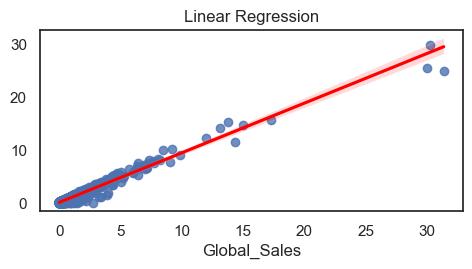

In [214]:
# Regression plot
plt.figure(figsize=(12, 8))
plt.subplot(3, 2, 5)
sns.regplot(x=y_test,y= y_pred_lr,line_kws={"color":"red"})
plt.title("Linear Regression")

In [216]:
# Display the first few predictions alongside the actual values
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_lr})
print(predictions.head())

       Actual  Predicted
9172     0.14   0.207666
5906     0.30   0.347793
7003     0.23   0.272289
10503    0.10   0.105295
289      4.08   4.448246


In [222]:
mae_LR = mean_absolute_error(y_test,y_pred_lr)
mse_LR = mean_squared_error(y_test,y_pred_lr)
r2_LR = r2_score(y_test, y_pred_lr)

#Adjusted R2
# Number of observations and features
n = X_train_scaled.shape[0]  # number of data points
p = X_train_scaled.shape[1]  # number of features

# Calculate Adjusted R-squared
adjusted_r2_LR = 1 - (1 - r2_LR) * (n - 1) / (n - p - 1)

print("Linear Regression Evaluation: \n")
print(f"Mean absolute error is {mae_LR}")
print(f"Mean Squared error is {mse_LR}")
print(f"R square error is {r2_LR}")
# print(f"Adjusted R-squared: {adjusted_r2}")

# Cross-validation for Linear Regression
cv = KFold(n_splits=5, shuffle=True, random_state=1)
cv_scores = cross_val_score(LR_model1, X_train_scaled, y_train, cv=cv, scoring='r2')
# print(f"Linear Regression Cross-Validation R^2 Scores: {cv_scores}")
print(f"Mean CV R^2 Score: {np.mean(cv_scores)}")


Linear Regression Evaluation: 

Mean absolute error is 0.1099823548951162
Mean Squared error is 0.06475633420929916
R square error is 0.9682750903731542
Mean CV R^2 Score: 0.9601227506347845


In [228]:
from sklearn.metrics import confusion_matrix

# Define a threshold
threshold = 0.5

# Convert both y_test and y_pred to binary
y_test_class = [1 if actual >= threshold else 0 for actual in y_test]
y_pred_class = [1 if pred >= threshold else 0 for pred in y_pred_lr]

# Generate the confusion matrix
cm = confusion_matrix(y_test_class, y_pred_class)

# Extract TP, TN, FP, FN
TN, FP, FN, TP = cm.ravel()

# Display
print("Confusion Matrix:")
print(cm)
print(f"True Positives: {TP}")
print(f"True Negatives: {TN}")
print(f"False Positives: {FP}")
print(f"False Negatives: {FN}")

accuracy = (TP + TN) / (TP + TN + FP + FN)
print(accuracy)

Confusion Matrix:
[[2357   95]
 [  73  734]]
True Positives: 734
True Negatives: 2357
False Positives: 95
False Negatives: 73
0.9484504449217551


In [230]:
#Printing Accuracy in our Linear model
Accuracy_LR_train = LR_model1.score(X_train_scaled, y_train)
print ("Accuracy in the training data with Linear Regression Model: ", Accuracy_LR_train*100, "%")

accuracy_LR_test = LR_model1.score(X_test_scaled, y_test)
print ("Accuracy in the test data with Linear Regression model", accuracy_LR_test*100, "%")

Accuracy in the training data with Linear Regression Model:  96.46124131936264 %
Accuracy in the test data with Linear Regression model 96.82750903731542 %


## Lasso, Ridge 

In [232]:
# Initialize models
params ={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,0.1, 1, 10, 100]}
lasso = Lasso(alpha=0.1)        # You can tune alpha to control regularization strength
ridge = Ridge(alpha=0.1)        # Similar, tune alpha for Ridge regularization

# Train models
lasso.fit(X_train_scaled, y_train)
ridge.fit(X_train_scaled, y_train)


# Predict with each model
y_pred_lasso = lasso.predict(X_test_scaled)
y_pred_ridge = ridge.predict(X_test_scaled)

# Evaluate all models
evaluate_model(y_test, y_pred_lasso, 'Lasso')
evaluate_model(y_test, y_pred_ridge, 'Ridge')


Lasso Results:
MAE: 0.1162
MSE: 0.0823
R²: 0.9597

Ridge Results:
MAE: 0.1100
MSE: 0.0648
R²: 0.9683


In [234]:
grid_search = GridSearchCV(Ridge(), params, cv=5)
grid_search.fit(X_train_scaled, y_train)
print("Best Alpha for Ridge:", grid_search.best_params_)

Best Alpha for Ridge: {'alpha': 10}


In [236]:

# Define parameter grids for Lasso, Ridge, and ElasticNet
params ={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,0.1, 1, 10, 100]}
# Initialize models
lasso = Lasso()
ridge = Ridge()

# Create GridSearchCV objects
grid_lasso = GridSearchCV(lasso, params, cv=5, scoring='neg_mean_squared_error')
grid_ridge = GridSearchCV(ridge, params, cv=5, scoring='neg_mean_squared_error')

# Fit the models to training data using GridSearchCV
grid_lasso.fit(X_train_scaled, y_train)
grid_ridge.fit(X_train_scaled, y_train)

# Best alpha values found by GridSearchCV
best_lasso_alpha = grid_lasso.best_params_['alpha']
best_ridge_alpha = grid_ridge.best_params_['alpha']

# Print the best alpha values
print(f"Best Lasso alpha: {best_lasso_alpha}")


# # Get the best parameters and the best score for each model
# print(f"Best parameters for Lasso: {grid_lasso.best_params_}")
# print(f"Best parameters for Ridge: {grid_ridge.best_params_}")

# Get the best models
best_lasso_model = grid_lasso.best_estimator_
best_ridge_model = grid_ridge.best_estimator_

# Make predictions and evaluate each model
y_pred_lasso = best_lasso_model.predict(X_test_scaled)
y_pred_ridge = best_ridge_model.predict(X_test_scaled)

# Evaluate all models
evaluate_model(y_test, y_pred_lasso, 'Lasso')
print("Lasso Coefficients:", best_lasso_model.coef_)



Best Lasso alpha: 0.01

Lasso Results:
MAE: 0.1095
MSE: 0.0657
R²: 0.9678
Lasso Coefficients: [-3.14729324e-03  1.53945546e-03  8.79010107e-05  9.59462702e-01
  6.91735231e-01]


In [238]:
print(f"Best Ridge alpha: {best_ridge_alpha}")
evaluate_model(y_test, y_pred_ridge, 'Ridge')

Best Ridge alpha: 100

Ridge Results:
MAE: 0.1098
MSE: 0.0653
R²: 0.9680


Text(0.5, 1.0, 'Ridge Regression')

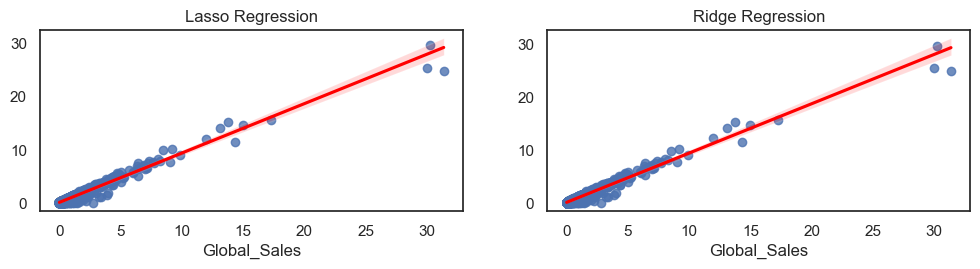

In [240]:
plt.figure(figsize=(12, 8))
plt.subplot(3, 2, 3)
sns.regplot(x=y_test, y=y_pred_lasso, line_kws={"color": "red"})
plt.title("Lasso Regression")
plt.subplot(3, 2, 4)
sns.regplot(x=y_test, y=y_pred_ridge, line_kws={"color": "red"})
plt.title("Ridge Regression")

## Decision Tree

In [242]:
DTR  = DecisionTreeRegressor()

In [244]:
DTR.fit(X_train_scaled, y_train)
#Comparing the model predicted results vs the Test set
y_pred_dt1 = DTR.predict(X_test_scaled)
y_pred_dt1

array([0.14, 0.32, 0.23, ..., 0.92, 0.1 , 0.59])

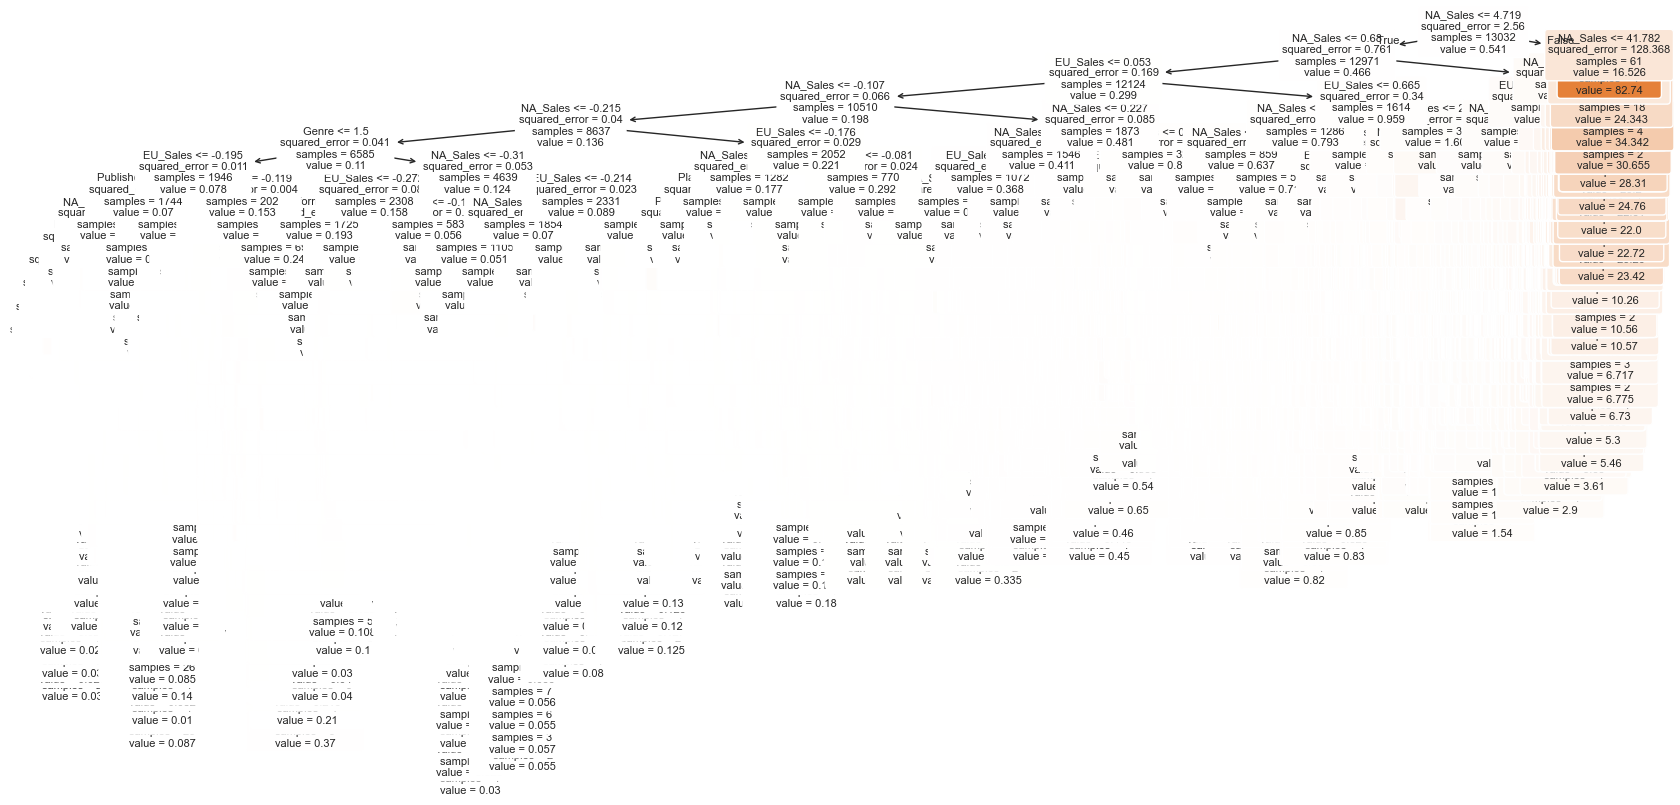

In [246]:
plt.figure(figsize=(20,10))
tree.plot_tree(DTR,feature_names=X.columns,filled=True,  rounded=True, fontsize=8)
plt.show()

In [247]:
#Comparing the model predicted results vs the Test set
y_pred_dt1 = DTR.predict(X_test_scaled)
y_pred_dt1

array([0.14, 0.32, 0.23, ..., 0.92, 0.1 , 0.59])

In [248]:
# # Model evaluation
# mse_dt = mean_squared_error(y_test, )
# mae_dt = mean_absolute_error(y_test, y_pred_dt1)
# r2_dt = r2_score(y_test, y_pred_dt1)

# print("Decision Tree Regression Results:")
# print(f"Mean Squared Error (MSE): {mse_dt}")
# print(f"Mean absolute Error (MAE): {mae_dt}")
# print(f"R-squared Score (R²): {r2_dt}")

# Evaluate tuned Decision Tree model
evaluate_model(y_test, y_pred_dt1, 'Decision Tree Base')


Decision Tree Base Results:
MAE: 0.1108
MSE: 0.1557
R²: 0.9237


Text(0.5, 1.0, 'Decision Tree Model')

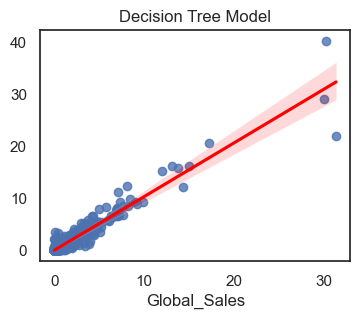

In [249]:
plt.figure(figsize=(4, 3))
sns.regplot(x=y_test, y=y_pred_dt1, line_kws={"color": "red"})
plt.title("Decision Tree Model")

In [250]:
#printing Accuracy in our DTR Model
Accuracy = DTR.score(X_train_scaled, y_train)
print ("Accuracy in the training data with Decision Tree Regression model before tuning  : ", Accuracy*100, "%")

accuracy = DTR.score(X_test_scaled, y_test)
print ("Accuracy in the test data with Decision Tree Regression model before tuining : ", accuracy*100, "%")

Accuracy in the training data with Decision Tree Regression model before tuning  :  99.76882182303696 %
Accuracy in the test data with Decision Tree Regression model before tuining :  92.37401813144479 %


## Hyperparameter tuning for Decision Tree:

In [251]:
#There is an overfitting
#  hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 10, 15, None],      # Limits tree depth
    'min_samples_split': [2, 5, 10],        # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 5]           # Minimum samples per leaf
}

# Initialize Decision Tree Regressor
dt2 = DecisionTreeRegressor(random_state=42)

# Perform GridSearchCV
grid_search = GridSearchCV(dt2, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Best parameters
best_params = grid_search.best_params_
print(f"Best parameters for Decision Tree: {best_params}")

# Train best Decision Tree model
best_dt_model = grid_search.best_estimator_
y_pred_best_dt = best_dt_model.predict(X_test_scaled)

# Evaluate tuned Decision Tree model
evaluate_model(y_test, y_pred_best_dt, 'Tuned Decision Tree')

Best parameters for Decision Tree: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}

Tuned Decision Tree Results:
MAE: 0.1125
MSE: 0.1122
R²: 0.9450


Text(0.5, 1.0, 'Decision Tree (Tuned)')

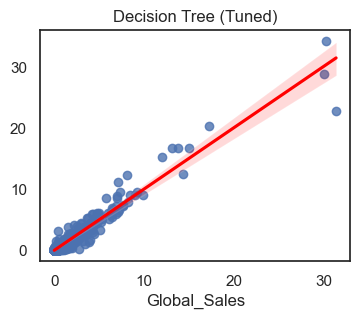

In [252]:
plt.figure(figsize=(4, 3))
# plt.subplot(1, 2, 2)
sns.regplot(x=y_test, y=y_pred_best_dt, line_kws={"color": "red"})
plt.title("Decision Tree (Tuned)")

In [253]:
# Get accuracy (R² Score) for training and test data
train_accuracy_tuned = best_dt_model.score(X_train_scaled, y_train) * 100
test_accuracy_tuned = best_dt_model.score(X_test_scaled, y_test) * 100

# Print Accuracy
print(f"Accuracy in training data after tuning: {train_accuracy_tuned:.2f}%")
print(f"Accuracy in test data after tuning: {test_accuracy_tuned:.2f}%")


Accuracy in training data after tuning: 98.25%
Accuracy in test data after tuning: 94.50%


## Random Forest

In [262]:
# Initialize Random Forest Regressor with default parameters
rf_model = RandomForestRegressor()

# Train the model on scaled training data
rf_model.fit(X_train_scaled, y_train)

# Make predictions using the trained model
y_pred_rf_model = rf_model.predict(X_test_scaled)

# Evaluate the Random Forest model without tuning
evaluate_model(y_test, y_pred_rf_model, 'Random Forest Model')


Random Forest Model Results:
MAE: 0.0919
MSE: 0.0870
R²: 0.9574


In [263]:
# Calculate accuracy (R² score) on training and test data
train_accuracy_rf_model = rf_model.score(X_train_scaled, y_train) * 100
test_accuracy_rf_model = rf_model.score(X_test_scaled, y_test) * 100

# Print the accuracy
print(f"Accuracy in training data with Random Forest (default): {train_accuracy_rf_model:.2f}%")
print(f"Accuracy in test data with Random Forest (default): {test_accuracy_rf_model:.2f}%")

Accuracy in training data with Random Forest (default): 98.29%
Accuracy in test data with Random Forest (default): 95.74%


In [386]:
# # Select a single decision tree from the random forest
# single_tree = rf_model.estimators_[0]  # First tree in the ensemble

# plt.figure(figsize=(20,10))
# plot_tree(single_tree, feature_names=X.columns, filled=True)
# plt.show()

In [305]:
# from sklearn.tree import export_text

# # Select a single decision tree from the RandomForestRegressor
# single_tree = rf_model.estimators_[0]  # Extract first tree

# # Export tree structure as text
# tree_text = export_text(single_tree, feature_names=X.columns)

# # Print the decision tree structure
# print(tree_text)

Text(0.5, 1.0, 'Random Forest (Default)')

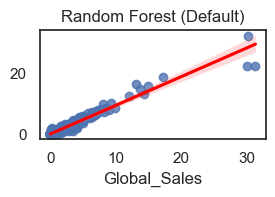

In [266]:
plt.subplot(3, 2, 1)
sns.regplot(x=y_test, y=y_pred_rf_model, line_kws={"color": "red"})
plt.title("Random Forest (Default)")

## Hyperparameter Tuning for Random Forest:

In [268]:
# Define hyperparameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],    # Number of trees
    'max_depth': [3, 5, 10, None],       # Limits tree depth
    'min_samples_split': [2, 5, 10],     # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 5],       # Minimum samples per leaf
    'bootstrap': [True, False]           # Whether bootstrap samples are used
}

# Initialize Random Forest Regressor
rf2 = RandomForestRegressor()

# Perform GridSearchCV for hyperparameter tuning
grid_search_rf = GridSearchCV(rf2, param_grid_rf, cv=5, scoring='r2', n_jobs=-1)
grid_search_rf.fit(X_train_scaled, y_train)

# Best parameters from GridSearchCV
best_params_rf = grid_search_rf.best_params_
print(f"Best parameters for Random Forest: {best_params_rf}")

# Train the best Random Forest model
best_rf_model = grid_search_rf.best_estimator_

# Make predictions with the tuned model
y_pred_rf = best_rf_model.predict(X_test_scaled)

# Evaluate tuned Random Forest model
evaluate_model(y_test, y_pred_rf, 'Tuned Random Forest')

Best parameters for Random Forest: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

Tuned Random Forest Results:
MAE: 0.0912
MSE: 0.0821
R²: 0.9598


In [269]:
# Calculate R² (accuracy) for both training and test data
train_accuracy_rf = best_rf_model.score(X_train_scaled, y_train) * 100
test_accuracy_rf = best_rf_model.score(X_test_scaled, y_test) * 100

print(f"Accuracy in training data with Random Forest after tuning: {train_accuracy_rf:.2f}%")
print(f"Accuracy in test data with Random Forest after tuning: {test_accuracy_rf:.2f}%")

Accuracy in training data with Random Forest after tuning: 98.73%
Accuracy in test data with Random Forest after tuning: 95.98%


Text(0.5, 1.0, 'Random Forest (Tuned)')

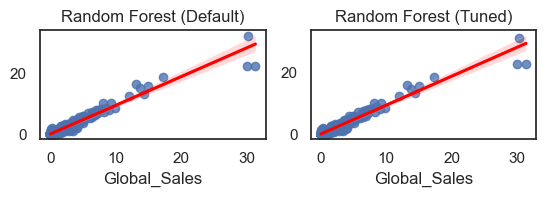

In [270]:
plt.subplot(3, 2, 1)
sns.regplot(x=y_test, y=y_pred_rf_model, line_kws={"color": "red"})
plt.title("Random Forest (Default)")

plt.subplot(3, 2, 2)
sns.regplot(x=y_test, y=y_pred_rf, line_kws={"color": "red"})
plt.title("Random Forest (Tuned)")

## Gradient Boosting

In [271]:
# Initialize Gradient Boosting Regressor with default parameters
gbr = GradientBoostingRegressor()

# Train the model
gbr.fit(X_train_scaled, y_train)

# Make predictions
y_pred_gbr = gbr.predict(X_test_scaled)

# Evaluate Gradient Boosting model
evaluate_model(y_test, y_pred_gbr, 'Gradient Boosting')




Gradient Boosting Results:
MAE: 0.0907
MSE: 0.0561
R²: 0.9725


In [272]:
# Calculate accuracy (R² score) for both training and test data
train_accuracy_gbr = gbr.score(X_train_scaled, y_train) * 100
test_accuracy_gbr = gbr.score(X_test_scaled, y_test) * 100

# Print accuracy results
print(f"Accuracy in training data with Gradient Boosting: {train_accuracy_gbr:.2f}%")
print(f"Accuracy in test data with Gradient Boosting: {test_accuracy_gbr:.2f}%")

Accuracy in training data with Gradient Boosting: 98.19%
Accuracy in test data with Gradient Boosting: 97.25%


Text(0.5, 1.0, 'Gradient Boosting (Default)')

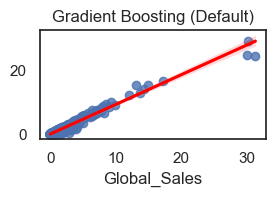

In [273]:
plt.subplot(3, 2, 3)
sns.regplot(x=y_test, y=y_pred_gbr, line_kws={"color": "red"})
plt.title("Gradient Boosting (Default)")

## Hyperparameter Tuning for Gradient Boosting:

In [274]:
param_grid = {
    'n_estimators': [100, 300, 500],  # Number of boosting stages
    'learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage
    'max_depth': [3, 5, 10],  # Depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 5]  # Minimum number of samples in a leaf node
}

# Perform GridSearchCV for tuning
grid_search = GridSearchCV(gbr, param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=1)
grid_search.fit(X_train_scaled, y_train)

# Best parameters from tuning
best_params_gbr = grid_search.best_params_
print(f"Best Parameters for Gradient Boosting: {best_params_gbr}")

# Train the best model
best_gbr = grid_search.best_estimator_
y_pred_gbr_tuned = best_gbr.predict(X_test_scaled)

# Evaluate Tuned Gradient Boosting Model
evaluate_model(y_test, y_pred_gbr_tuned, 'Tuned Gradient Boosting')


Fitting 5 folds for each of 243 candidates, totalling 1215 fits


C:\Users\prajj\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 500}

Tuned Gradient Boosting Results:
MAE: 0.0804
MSE: 0.0527
R²: 0.9742


In [275]:

# Accuracy after tuning
train_accuracy_gbr_tuned = best_gbr.score(X_train_scaled, y_train) * 100
test_accuracy_gbr_tuned = best_gbr.score(X_test_scaled, y_test) * 100

print(f"Accuracy in training data with Tuned Gradient Boosting: {train_accuracy_gbr_tuned:.2f}%")
print(f"Accuracy in test data with Tuned Gradient Boosting: {test_accuracy_gbr_tuned:.2f}%")

Accuracy in training data with Tuned Gradient Boosting: 98.89%
Accuracy in test data with Tuned Gradient Boosting: 97.42%


Text(0.5, 1.0, 'Gradient Boosting (Tuned)')

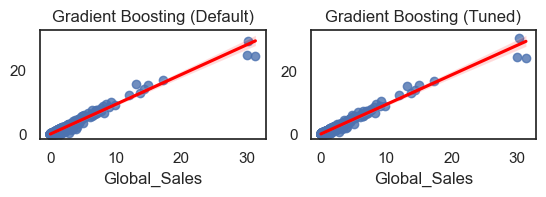

In [276]:
plt.subplot(3, 2, 3)
sns.regplot(x=y_test, y=y_pred_gbr, line_kws={"color": "red"})
plt.title("Gradient Boosting (Default)")

plt.subplot(3, 2, 4)
sns.regplot(x=y_test, y=y_pred_gbr_tuned, line_kws={"color": "red"})
plt.title("Gradient Boosting (Tuned)")

## Feature importance chart 

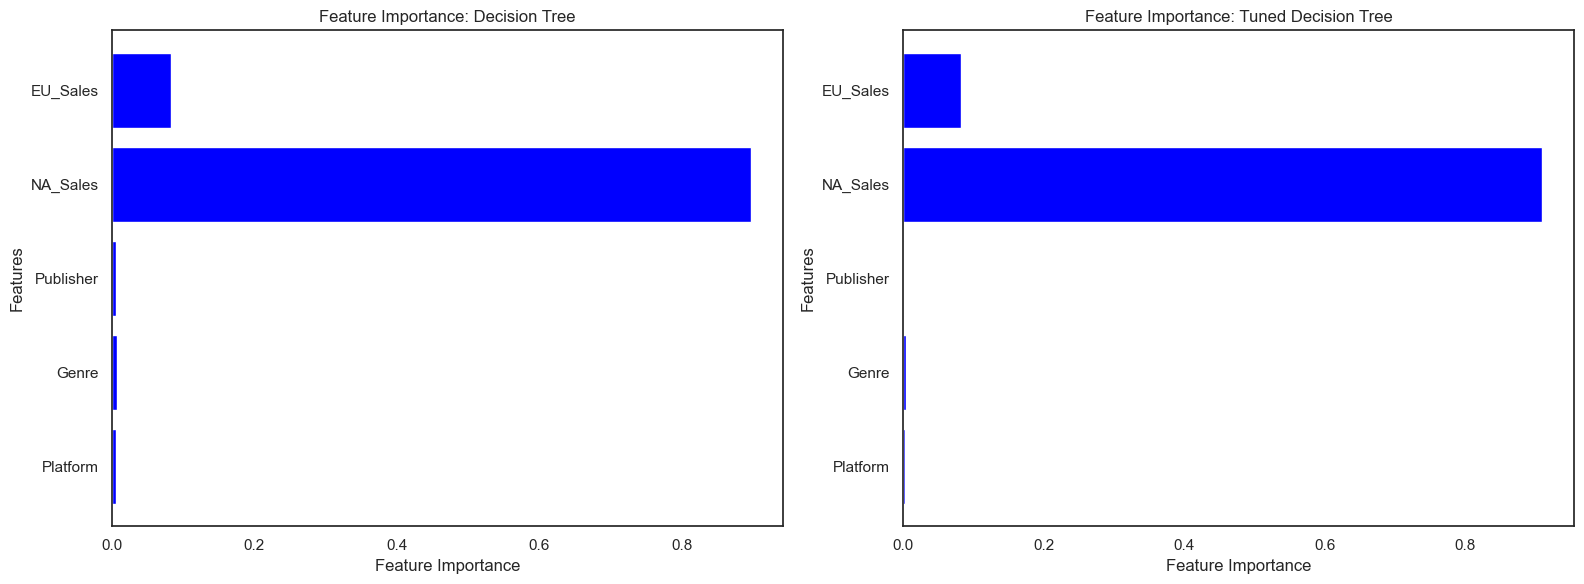

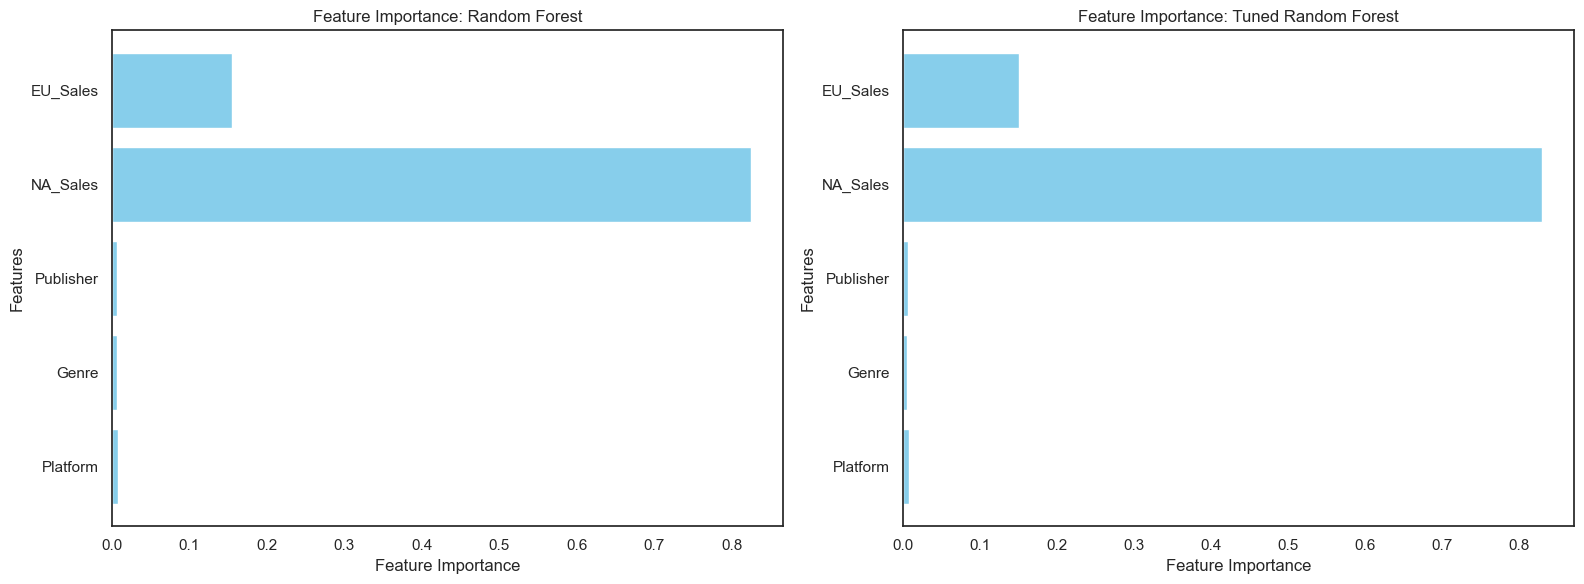

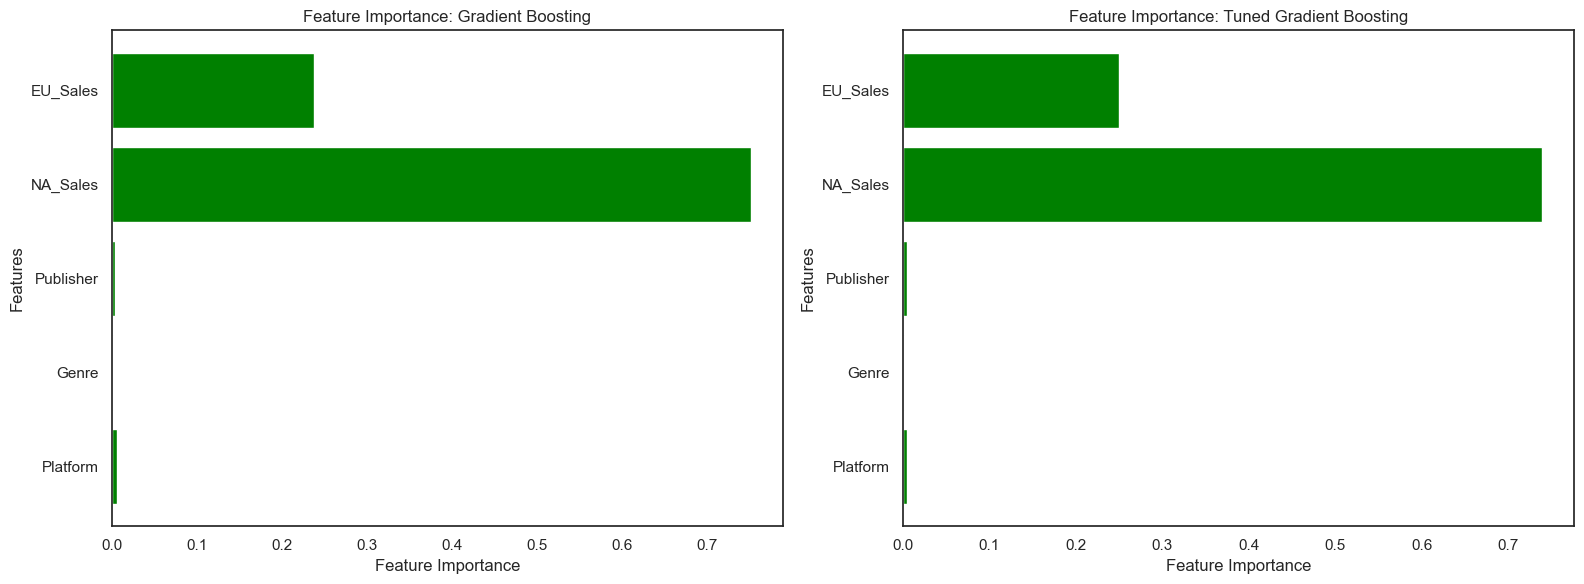

In [277]:
# First line: Decision Tree and Random Forest feature importance
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Decision Tree feature importance
axes[0].barh(X.columns, DTR.feature_importances_, color='blue')
axes[0].set_xlabel("Feature Importance")
axes[0].set_ylabel("Features")
axes[0].set_title("Feature Importance: Decision Tree")

# Plot 2: Random Forest feature importance
axes[1].barh(X.columns, best_dt_model.feature_importances_, color='blue')
axes[1].set_xlabel("Feature Importance")
axes[1].set_ylabel("Features")
axes[1].set_title("Feature Importance: Tuned Decision Tree")

plt.tight_layout()
plt.show()

# Second line: Best Random Forest and Gradient Boosting feature importance
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Tuned Random Forest feature importance
axes[0].barh(X.columns, rf_model.feature_importances_, color='skyblue')
axes[0].set_xlabel("Feature Importance")
axes[0].set_ylabel("Features")
axes[0].set_title("Feature Importance: Random Forest")



# Plot 2: Gradient Boosting feature importance
axes[1].barh(X.columns, best_rf_model.feature_importances_, color='skyblue')
axes[1].set_xlabel("Feature Importance")
axes[1].set_ylabel("Features")
axes[1].set_title("Feature Importance: Tuned Random Forest")

plt.tight_layout()
plt.show()

# Third line: Tuned Gradient Boosting feature importance
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].barh(X.columns, gbr.feature_importances_, color='green')
axes[0].set_xlabel("Feature Importance")
axes[0].set_ylabel("Features")
axes[0].set_title("Feature Importance: Gradient Boosting")

axes[1].barh(X.columns, best_gbr.feature_importances_, color='green')
axes[1].set_xlabel("Feature Importance")
axes[1].set_ylabel("Features")
axes[1].set_title("Feature Importance: Tuned Gradient Boosting")

plt.tight_layout()
plt.show()



# Section 10: Model Comparison

In [309]:
# Dictionary to store model performance
model_performance = {
    "Model": ["Linear Regression","Lasso", "Ridge", 
              "Decision Tree Model Default", "Decision Tree (Tuned)", 
              "Random Forest (Default)", "Random Forest (Tuned)",
              "Gradient Boosting (Default)", "Gradient Boosting (Tuned)"],
    
    # "Train Accuracy (%)": [
    #     best_lasso_model.score(X_train_scaled, y_train) * 100, 
    #     best_ridge_model.score(X_train_scaled, y_train) * 100,
    #     DTR.score(X_train_scaled, y_train) * 100, 
    #     best_dt_model.score(X_train_scaled, y_train) * 100,
    #     rf_model.score(X_train_scaled, y_train) * 100, 
    #     best_rf_model.score(X_train_scaled, y_train) * 100,
    #     gbr.score(X_train_scaled, y_train) * 100, 
    #     best_gbr.score(X_train_scaled, y_train) * 100
    # ],
    

    "MSE": [
        mean_squared_error(y_test,y_pred_lr),
        mean_squared_error(y_test, y_pred_lasso), 
        mean_squared_error(y_test, y_pred_ridge),
        mean_squared_error(y_test, y_pred_dt1), 
        mean_squared_error(y_test, y_pred_best_dt),
        mean_squared_error(y_test, y_pred_rf_model), 
        mean_squared_error(y_test, y_pred_rf),
        mean_squared_error(y_test, y_pred_gbr), 
        mean_squared_error(y_test, y_pred_gbr_tuned)
    ],
    
    "MAE": [
        mean_absolute_error(y_test,y_pred_lr),
        mean_absolute_error(y_test, y_pred_lasso), 
        mean_absolute_error(y_test, y_pred_ridge),
        mean_absolute_error(y_test, y_pred_dt1), 
        mean_absolute_error(y_test, y_pred_best_dt),
        mean_absolute_error(y_test, y_pred_rf_model), 
        mean_absolute_error(y_test, y_pred_rf),
        mean_absolute_error(y_test, y_pred_gbr), 
        mean_absolute_error(y_test, y_pred_gbr_tuned)
    ],
    "Accuracy (%)": [
        r2_LR*100,
        best_lasso_model.score(X_test_scaled, y_test) * 100, 
        best_ridge_model.score(X_test_scaled, y_test) * 100,
        DTR.score(X_test_scaled, y_test) * 100, 
        best_dt_model.score(X_test_scaled, y_test) * 100,
        rf_model.score(X_test_scaled, y_test) * 100, 
        best_rf_model.score(X_test_scaled, y_test) * 100,
        gbr.score(X_test_scaled, y_test) * 100, 
        best_gbr.score(X_test_scaled, y_test) * 100
    ]

}




In [311]:
# Convert dictionary to DataFrame for easy visualization
performance_df = pd.DataFrame(model_performance)

performance_df = performance_df.round(2)


# Sort models by Test Accuracy (R² Score) in descending order
performance_df = performance_df.sort_values(by="Accuracy (%)", ascending=False,ignore_index=True)

# Print performance comparison table
print("\nOverall Model Performance Comparison:")
performance_df



Overall Model Performance Comparison:


,Model,MSE,MAE,Accuracy (%)
0,Gradient Boosting (Tuned),0.05,0.08,97.42
1,Gradient Boosting (Default),0.06,0.09,97.25
2,Linear Regression,0.06,0.11,96.83
3,Ridge,0.07,0.11,96.80
4,Lasso,0.07,0.11,96.78
5,Random Forest (Tuned),0.08,0.09,95.98
6,Random Forest (Default),0.09,0.09,95.74
7,Decision Tree (Tuned),0.11,0.11,94.50
8,Decision Tree Model Default,0.16,0.11,92.37


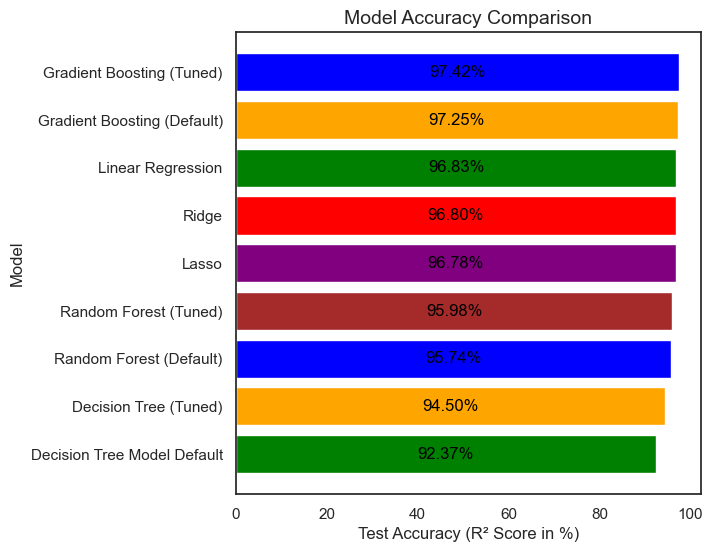

In [313]:
# ---- Plot Accuracy Comparison ----
plt.figure(figsize=(6, 6))
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown']
plt.barh(performance_df["Model"], performance_df["Accuracy (%)"], color=colors[:len(performance_df)])


# Annotate the bars with accuracy percentage inside a box
for i, (accuracy, model) in enumerate(zip(performance_df["Accuracy (%)"], performance_df["Model"])):
    # Adjust text placement to be inside the box
    plt.text(accuracy /2, i, f'{accuracy:.2f}%', ha='center', va='center', fontsize=12, color='black')
             # bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.2'))



plt.xlabel("Test Accuracy (R² Score in %)",fontsize=12)
plt.ylabel("Model",fontsize=12)
plt.title("Model Accuracy Comparison", fontsize=14)
plt.gca().invert_yaxis()  # Invert Y-axis to show highest accuracy at the top
plt.show()

In [319]:
# Define model groups
linear_models = ["Lasso", "Ridge", "Linear Regression"]
decision_tree_models = ["Decision Tree Model Default", "Decision Tree (Tuned)"]
random_forest_models = ["Random Forest (Default)", "Random Forest (Tuned)"]
gradient_boosting_models = ["Gradient Boosting (Default)", "Gradient Boosting (Tuned)"]

# Select best-performing model from each group
best_linear = performance_df[performance_df["Model"].isin(linear_models)].sort_values(by="Accuracy (%)", ascending=False).iloc[0]
best_tree = performance_df[performance_df["Model"].isin(decision_tree_models)].sort_values(by="Accuracy (%)", ascending=False).iloc[0]
best_rf = performance_df[performance_df["Model"].isin(random_forest_models)].sort_values(by="Accuracy (%)", ascending=False).iloc[0]
best_gb = performance_df[performance_df["Model"].isin(gradient_boosting_models)].sort_values(by="Accuracy (%)", ascending=False).iloc[0]

# Create new DataFrame
best_models_df = pd.DataFrame([best_linear, best_tree, best_rf, best_gb])

# Sort in ascending order of Accuracy
best_models_df = best_models_df.sort_values(by="Accuracy (%)", ascending=False, ignore_index=True)

# Display result
print("\n Best Model from Each Category:")
print(best_models_df)



🔝 Best Model from Each Category:
                       Model   MSE   MAE  Accuracy (%)
0  Gradient Boosting (Tuned)  0.05  0.08         97.42
1          Linear Regression  0.06  0.11         96.83
2      Random Forest (Tuned)  0.08  0.09         95.98
3      Decision Tree (Tuned)  0.11  0.11         94.50


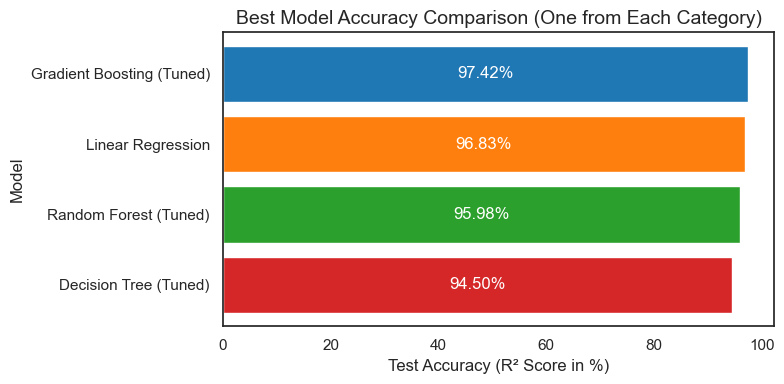

In [337]:
# ---- Plot Accuracy Comparison ----
plt.figure(figsize=(8, 4))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # Custom color palette
bar_height = 0.3 
plt.barh(best_models_df["Model"], best_models_df["Accuracy (%)"], color=colors)

# Annotate bars with accuracy values
for i, (accuracy, model) in enumerate(zip(best_models_df["Accuracy (%)"], best_models_df["Model"])):
    plt.text(accuracy / 2, i, f'{accuracy:.2f}%', ha='center', va='center', fontsize=12, color='white')

plt.xlabel("Test Accuracy (R² Score in %)", fontsize=12)
plt.ylabel("Model", fontsize=12)
plt.title("Best Model Accuracy Comparison (One from Each Category)", fontsize=14)
plt.gca().invert_yaxis()  # Highest at top
plt.tight_layout()
plt.show()